In [1]:
import pydap
from pydap.client import open_url

#Open data stream using OPeNDAP link to file and look for data fields

In [2]:
datafile = open_url('https://hs3.nsstc.nasa.gov/opendap/hyrax/hs3/HAMSR/data/2013/HAMSR_L2_20130903T034600_20130904T020933_v01.nc')
print datafile.keys()

['time', 'lat', 'lon', 'altitude', 'TB', 'inc', 'AClat', 'AClon', 'ACroll', 'ACpitch', 'ACheading', 'PWV', 'CLW', 'sea_ice_flag', 'anc_sfc_ht', 'anc_Psfc', 'land_flag', 'anc_ws', 'ham_airT', 'ham_airQ', 'ham_airL', 'ham_airRH', 'ham_airPT', 'ham_airEPT', 'ham_LCL', 'ham_LFC', 'ham_prof_PWV', 'ham_prof_CLW', 'ham_sfc_airT', 'ham_sfc_airQ', 'ham_sfc_airRH', 'ham_FltLvl_airT', 'ham_FltLvl_airQ', 'ham_FltLvl_airRH', 'ham_ret_qual_flag', 'ham_pres_levels', 'ham_airHt', 'ham_dBz', 'ham_dBz_heights']


#Lets plot the ham_dBz field

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

#Define the variables for cross track length and lat/lon subset the data for the desired variable

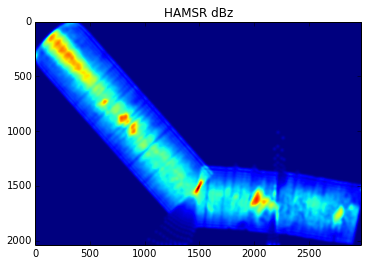

In [4]:
#Get 'length of cross track' as dim_cross_track_length
dim_cross_track_length = 42

#Define along track start and end
start_at = 4000
end_at = 4500

#Get 'hamsr_dbZ' variable as var_ham_dBz
var_ham_dBz = datafile['ham_dBz'][0,start_at:end_at,:]

#Get 'lats' variable as var_lat
var_lat = datafile['lat'][start_at:end_at,:]

#Get 'lons' variable as var_lon
var_lon = datafile['lon'][start_at:end_at,:]


#Get lats and lons for that range
lats = np.sort(np.unique(np.round(var_lat,3)))
lons = np.sort(np.unique(np.round(var_lon,3)))

#Our plotting variable
img = np.zeros((lons.size,lats.size))

##Compute pixel values
for at in range(0, end_at - start_at):
	for ct in range(0, dim_cross_track_length):
		index_lat = lats.size - np.searchsorted(lats, var_lat[at,ct])
		index_lon = np.searchsorted(lons, var_lon[at,ct])
		
		if(index_lat >=0 and index_lat < lats.size and index_lon >=0 and index_lon < lons.size):
			img[index_lon,index_lat] = var_ham_dBz[0,at,ct];
		
img = ndimage.filters.gaussian_filter(img,12)
plt.title('HAMSR dBz')
plt.imshow(img); 
plt.show();